# import all depedencies

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
import os

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
%matplotlib notebook

In [11]:
#pip install git+git://github.com/forrestbao/pyeeg.git

In [12]:
import pyeeg

# Load files from folders 

In [13]:
# import each and every file

dirB= r"C:/Users/LEKSHMI HARITHA/mtech AI/AML project/seizures-master/Datasets/setB/"
tempB = []
for file in os.listdir(dirB):
    fl = dirB + file
    tempB.append(fl)
tempB = sorted(tempB)    # class: 1     val:  -1

dirC= r"C:/Users/LEKSHMI HARITHA/mtech AI/AML project/seizures-master/Datasets/setC/"
tempC = []
for file in os.listdir(dirC):
    fl = dirC + file
    tempC.append(fl)
tempC = sorted(tempC)   # class:2       val: 0
    
dirE= r"C:/Users/LEKSHMI HARITHA/mtech AI/AML project/seizures-master/Datasets/setE/"
tempE = []
for file in os.listdir(dirE):
    fl = dirE + file
    tempE.append(fl)
tempE = sorted(tempE)   # class: 3        val: 1

# create small tables 

In [14]:
tb=[]
st = 'A'
for i in range(len(tempB)):
    x = pd.read_table(tempB[i],header=None)
    x.columns=[st+str(i)]
    tb.append(x)
    
tc=[]
st = 'A'
for i in range(len(tempC)):
    x = pd.read_table(tempC[i],header=None)
    x.columns=[st+str(i)]
    tc.append(x)
    
te=[]
st = 'A'
for i in range(len(tempE)):
    x = pd.read_table(tempE[i],header=None)
    x.columns=[st+str(i)]
    te.append(x)

# make big table

In [15]:
def table(table):
    big_table = None
    for ta in table:
        big_table = pd.concat([big_table, ta],axis=1)
    return big_table

In [16]:
bigB = table(tb)
bigC = table(tc)
bigE = table(te)
head = list(bigB.columns.values)

In [17]:
len(bigB.columns)

100

In [18]:
bigB.head(10)

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A90,A91,A92,A93,A94,A95,A96,A97,A98,A99
0,-24,-55,-36,-14,-58,87,-52,2,8,-53,...,62,-128,-83,98,-53,29,-76,27,-6,-18
1,-22,-48,-40,-5,-78,98,-56,-6,0,-15,...,49,-158,-120,178,-33,10,-102,4,-19,-13
2,-17,-48,-36,0,-83,103,-49,-22,-16,11,...,14,-161,-123,236,-23,-26,-95,1,-47,0
3,-18,-38,-35,7,-69,108,-51,-17,-38,38,...,-14,-158,-119,237,0,-81,-65,19,-83,9
4,-19,-23,-22,7,-31,97,-53,6,-31,35,...,-14,-152,-93,187,10,-127,-30,43,-99,6
5,-14,0,-15,-4,-4,86,-71,26,-19,48,...,-11,-144,-45,94,26,-148,2,57,-104,-20
6,-4,11,-4,-18,10,71,-96,40,12,65,...,-2,-117,17,-13,37,-140,25,54,-81,-67
7,-1,22,13,-15,9,76,-119,42,37,72,...,-16,-65,77,-114,28,-104,40,40,-46,-126
8,7,21,33,-6,1,96,-110,35,43,44,...,-34,-5,103,-185,15,-78,33,19,-1,-162
9,17,3,38,4,-10,100,-90,19,48,-2,...,-57,61,120,-219,1,-78,14,25,30,-165


# creat sub matrix for each

In [19]:
# creat a matrix
def creat_mat(mat):
    matx = np.zeros((len(mat),(len(head))))
    for i in range(len(head)):
        matx[:,i] = mat[head[i]]
        sleep(0.01)
    return matx
# every mat contain probs mat[:,i] total 28 start form mat1

In [20]:
matB = creat_mat(bigB) # : refers to healthy data
matC = creat_mat(bigC) # : refers to Inter-ictal (transition between healthy to seizure)
matE = creat_mat(bigE) # : of ictal or seizures

matB = np.nan_to_num(matB) # matB[:,0] --- > channel 0, matB[:,1] --- > channel 1 like that
matC = np.nan_to_num(matC)
matE = np.nan_to_num(matE)


# 4097 data point per channel 
# 173.61 Hz sample rate and there are 4097 data point for each channel
# total 100 channel are their
# 4097/173.61 = 23.59 sec 
# the raw data from one of the channels for the 23.59 sec

# Visualize the Datapoints

<IPython.core.display.Javascript object>


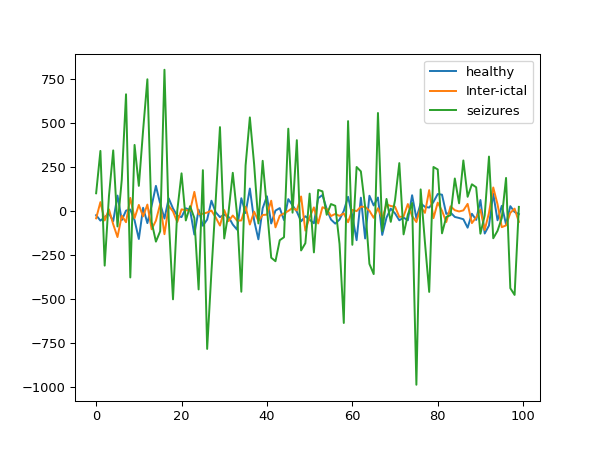

In [21]:
hl,      = plt.plot(matB[0],label='healthy')
trans,   = plt.plot(matC[0],label='Inter-ictal')
seizure, = plt.plot(matE[0],label='seizures')
plt.legend(handles=[hl,trans,seizure])
plt.savefig("fig1.png")

#  <---------  create number of featuters ------------>

# (DFA,HFD,SVD_Entropy,Fisher_Information,PFD)

In [22]:
help(pyeeg.dfa),help(pyeeg.hfd),help(pyeeg.svd_entropy),help(pyeeg.fisher_info),help(pyeeg.pfd)

Help on function dfa in module pyeeg.detrended_fluctuation_analysis:

dfa(X, Ave=None, L=None)
    Compute Detrended Fluctuation Analysis from a time series X and length of
    boxes L.
    
    The first step to compute DFA is to integrate the signal. Let original
    series be X= [x(1), x(2), ..., x(N)].
    
    The integrated signal Y = [y(1), y(2), ..., y(N)] is obtained as follows
    y(k) = \sum_{i=1}^{k}{x(i)-Ave} where Ave is the mean of X.
    
    The second step is to partition/slice/segment the integrated sequence Y
    into boxes. At least two boxes are needed for computing DFA. Box sizes are
    specified by the L argument of this function. By default, it is from 1/5 of
    signal length to one (x-5)-th of the signal length, where x is the nearest
    power of 2 from the length of the signal, i.e., 1/16, 1/32, 1/64, 1/128,
    ...
    
    In each box, a linear least square fitting is employed on data in the box.
    Denote the series on fitted line as Yn. Its k-th eleme

(None, None, None, None, None)

In [23]:
# source: https://www.hindawi.com/journals/cin/2011/406391/
def features(mat):
    Kmax = 5
    Tau  = 4
    DE   = 10
    M    = 10
    R    = 0.3
    Band = np.arange(1,86)
    Fs   = 173
    DFA                = pyeeg.dfa(mat)
    HFD                = pyeeg.hfd(mat,Kmax)
    SVD_Entropy        = pyeeg.svd_entropy(mat,Tau,DE)
    Fisher_Information = pyeeg.fisher_info(mat,Tau,DE)
    PFD                = pyeeg.pfd(mat)
    sleep(0.01)
    
    return (DFA,HFD,SVD_Entropy,Fisher_Information,PFD)

# Compute the features of datasets

In [24]:
'''
# this is three classification proble
# class1: healthy       +1
# class2: transition     0
# class3: dieases       -1

'''

'\n# this is three classification proble\n# class1: healthy       +1\n# class2: transition     0\n# class3: dieases       -1\n\n'

In [25]:
# create features of class I
f1_B    = np.zeros((100,1))
f2_B    = np.zeros((100,1))
f3_B    = np.zeros((100,1))
f4_B    = np.zeros((100,1))
f5_B    = np.zeros((100,1)) 
cl_B    = np.ones((100,1)) # 1


for i in range(100):
    [f1_B[i,0],f2_B[i,0],f3_B[i,0],f4_B[i,0],f5_B[i,0]]=features(matB[:,i])
    

C:\ProgramData\Anaconda3\lib\site-packages\pyeeg\detrended_fluctuation_analysis.py:125: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  F[i] += numpy.linalg.lstsq(c, y)[1]
C:\ProgramData\Anaconda3\lib\site-packages\pyeeg\detrended_fluctuation_analysis.py:129: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  Alpha = numpy.linalg.lstsq(numpy.vstack(
C:\ProgramData\Anaconda3\lib\site-packages\pyeeg\fractal_dimension.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` wher

In [26]:
# create features of class II
f1_C    = np.zeros((100,1))
f2_C    = np.zeros((100,1))
f3_C    = np.zeros((100,1))
f4_C    = np.zeros((100,1))
f5_C    = np.zeros((100,1))
cl_C    = np.zeros((100,1)) # transition means 0

for i in range(100):
    [f1_C[i,0],f2_C[i,0],f3_C[i,0],f4_C[i,0],f5_C[i,0]]=features(matC[:,i])
    

In [27]:
# create features of class III
f1_E    = np.zeros((100,1))
f2_E    = np.zeros((100,1))
f3_E    = np.zeros((100,1))
f4_E    = np.zeros((100,1))
f5_E    = np.zeros((100,1))
cl_E    = np.negative(np.ones((100,1))) # -1

for i in range(100):
    [f1_E[i,0],f2_E[i,0],f3_E[i,0],f4_E[i,0],f5_E[i,0]]=features(matE[:,i])
    

# create Feature and class matrix for each Classes

In [28]:
MftB = np.concatenate([f1_B,f2_B,f3_B,f4_B,f5_B,cl_B],axis=1)
MftC = np.concatenate([f1_C,f2_C,f3_C,f4_C,f5_C,cl_C],axis=1)
MftE = np.concatenate([f1_E,f2_E,f3_E,f4_E,f5_E,cl_E],axis=1)

In [29]:
FCM_B = pd.DataFrame(MftB,columns=['f1','f2','f3','f4','f5','class'])
FCM_C = pd.DataFrame(MftC,columns=['f1','f2','f3','f4','f5','class'])
FCM_E = pd.DataFrame(MftE,columns=['f1','f2','f3','f4','f5','class'])
FCM_B.head(4)

,f1,f2,f3,f4,f5,class
0,0.887621,0.185875,2.299474,2.299474,0.581396,1.0
1,0.783744,0.163794,2.299480,2.299480,0.588340,1.0
2,0.875873,0.154714,2.299477,2.299477,0.589802,1.0
3,0.881293,0.138396,2.299481,2.299481,0.592911,1.0


In [30]:
TotalDataset = pd.concat([FCM_B,FCM_C,FCM_E],ignore_index=True)
visDat = TotalDataset.copy(deep=True)
visDat['class'] = visDat['class'].map({1:'healthy',0:'transation',-1:'seizure'})

In [31]:
import seaborn as sbn
sbn.set(style="whitegrid", palette="muted")

In [37]:
visDat

,f1,f2,f3,f4,f5,class
0,0.887621,0.185875,2.299474,2.299474,0.581396,healthy
1,0.783744,0.163794,2.299480,2.299480,0.588340,healthy
2,0.875873,0.154714,2.299477,2.299477,0.589802,healthy
3,0.881293,0.138396,2.299481,2.299481,0.592911,healthy
4,0.798116,0.125291,2.299481,2.299481,0.595338,healthy
...,...,...,...,...,...,...
295,0.424106,0.092797,2.301373,2.301373,0.604564,seizure
296,0.101266,0.053133,2.301376,2.301376,0.637104,seizure
297,0.121906,0.089653,2.301379,2.301379,0.606438,seizure
298,0.341561,0.126592,2.301372,2.301372,0.600381,seizure


In [38]:
visDat.to_csv('boston.csv')

<IPython.core.display.Javascript object>


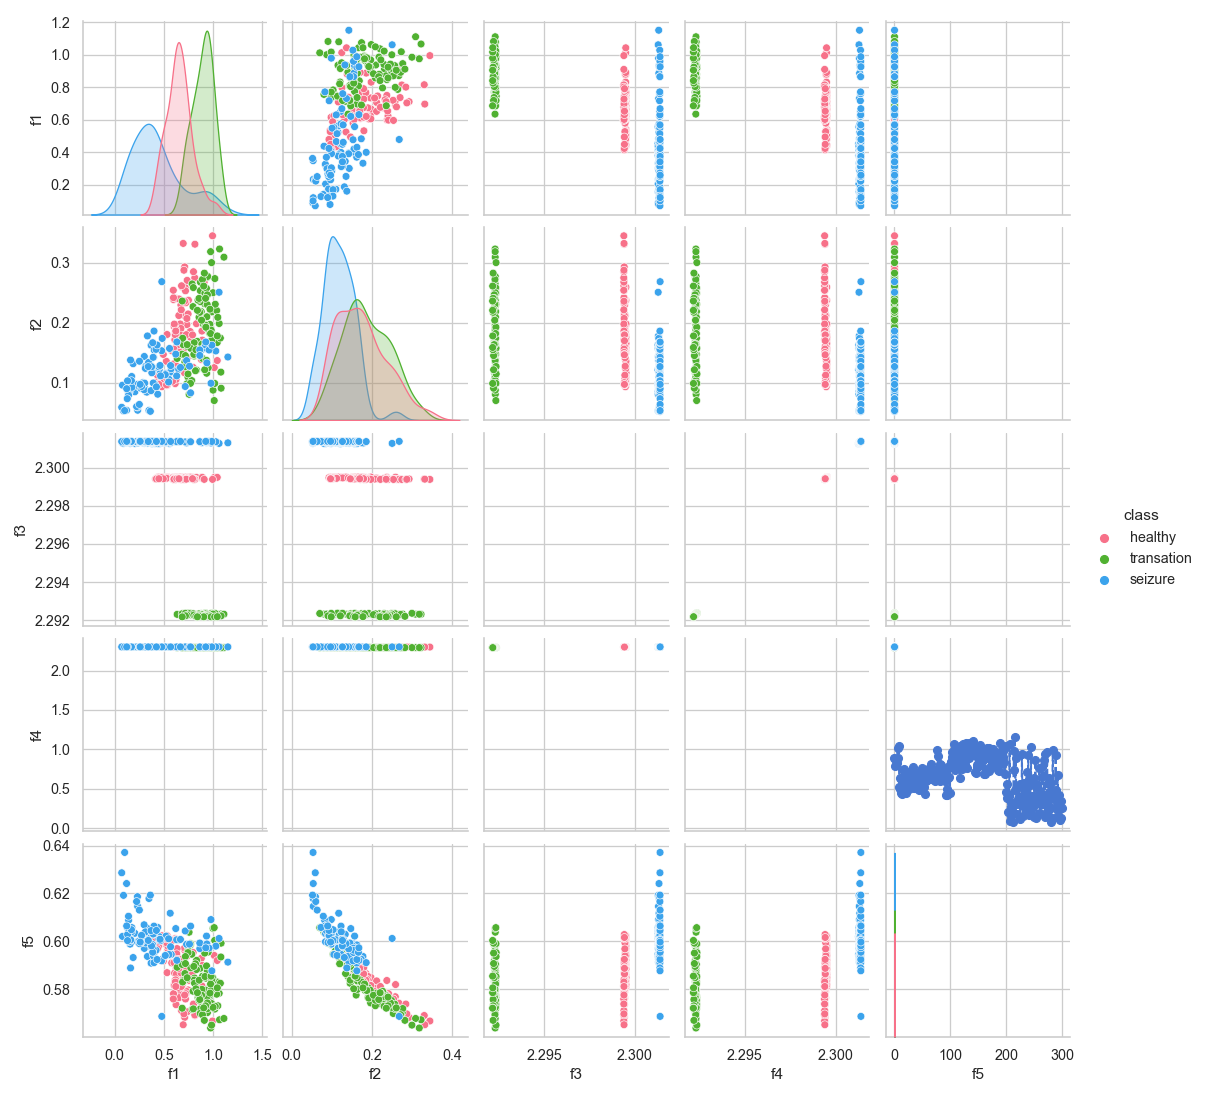

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

In [33]:
sbn.pairplot(visDat,hue='class',palette="husl")
plt.savefig("fig2.png")

In [34]:
plt.plot(visDat['f1'],'--o')

# Split arrays or matrices into random train and test subsets

In [22]:
from sklearn.model_selection import train_test_split

In [35]:
X = TotalDataset[['f1','f2','f3','f4','f5']]
y = TotalDataset[['class']]
X = np.asarray(X)
y = np.asarray(y)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# apply machine learning 

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [29]:
names = ["Nearest Neighbors", "Linear SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "AdaBoost",
         "Naive Bayes"]

In [30]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB()]


In [31]:
clf_score=[]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        clf_score.append([score,name])

In [32]:
clf_score

[[0.79797979797979801, 'Nearest Neighbors'],
 [0.29292929292929293, 'Linear SVM'],
 [0.9494949494949495, 'Gaussian Process'],
 [1.0, 'Decision Tree'],
 [1.0, 'Random Forest'],
 [1.0, 'AdaBoost'],
 [1.0, 'Naive Bayes']]